# Houston OIS Report

The following notebook analyzes OIS (officer-involved shootings) data collected by the Houston Police Department from 2015 to 2018 along with US census data. It does a comparison with a previous study as well as provide some new, interesting results.

Link to previous study: https://www.houstontx.gov/police/department_reports/ois/HPDThesis.pdf

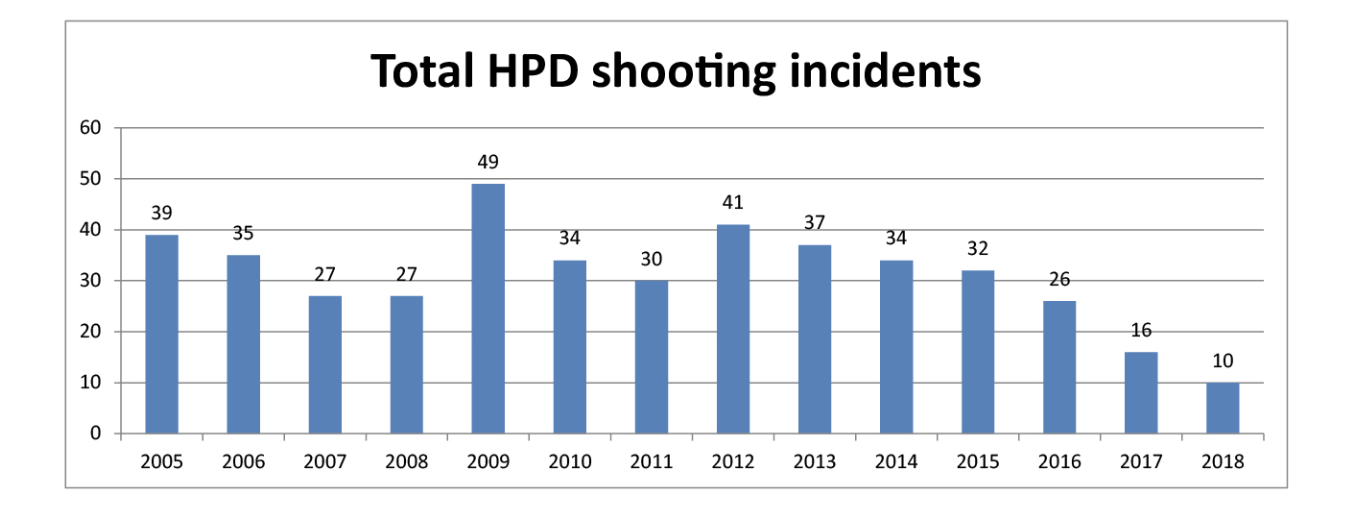

Police shootings have greatly decreased since the passing of Art. 2.139 of the Texas Code of Criminal Procedure that requires all law enforcement agencies to report all shootings. This notebook will analyze trends in the data from 2015-2018 and see how they differ from the trends reported by the previous study that analyzed data from before 2015.

# Processing the Data

### Loading the dataset

In [1]:
# Load libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import linear_model, metrics
from subprocess import check_output
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('/Users/nevingeorge/Desktop/CS/Python/Houston OIS/Combined Data.csv')

# Display beginning of dataset
pd.set_option('display.max_columns', None)
dataset.head()

,DATE,INC NO.,LOCATION,SUSPECT SEX,SUSPECT RACE,SUSPECT AGE,SUSPECT INJURY,SUSPECT WEAPON,OFFICER SEX 1,OFFICER RACE 1,OFFICER AGE 1,OFFICER INJURY 1,ON DUTY 1,OFFICER SEX 2,OFFICER RACE 2,OFFICER AGE 2,OFFICER INJURY 2,ON DUTY 2,OFFICER SEX 3,OFFICER RACE 3,OFFICER AGE 3,OFFICER INJURY 3,ON DUTY 3,OFFICER SEX 4,OFFICER RACE 4,OFFICER AGE 4,OFFICER INJURY 4,ON DUTY 4,OFFICER SEX 5,OFFICER RACE 5,OFFICER AGE 5,OFFICER INJURY 5,ON DUTY 5,OFFICER SEX 6,OFFICER RACE 6,OFFICER AGE 6,OFFICER INJURY 6,ON DUTY 6,OFFICER SEX 7,OFFICER RACE 7,OFFICER AGE 7,OFFICER INJURY 7,ON DUTY 7,RESPONSE TYPE,NUM OF OFFICERS,SYNOPSIS
0,7/26/18,95218318,4600 Tidwell,M,B,17,None,Firearm,M,H,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,2 or More,NaN
1,7/26/18,95218318,4600 Tidwell,M,B,19,Wounded,Firearm,M,H,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,2 or More,NaN
2,7/15/18,90024918,8600 Helmers St,M,H,18,Wounded,Firearm,M,W,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,2 or More,NaN
3,6/22/18,79427318,3434 Tidwell Rd,M,H,33,None,Firearm,M,B,44,None,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,1,NaN
4,6/18/18,77476418,10800 Sabo Rd,M,H,37,None,Other,M,W,56,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,1,NaN


### Adding and deleting data

In [2]:
#delete useless column
dataset.drop(["INC NO."], axis = 1, inplace=True)

#adding US Census data on the racial demographics of Houston
races = [dataset["SUSPECT RACE"]=="B", dataset["SUSPECT RACE"]=="H", dataset["SUSPECT RACE"]=="W", dataset["SUSPECT RACE"]=="A"]
numbers = [498466, 919668, 1060491,126378]
dataset["Population of Suspect Race"] = np.select(races, numbers, default="zero")

dataset.head()

,DATE,LOCATION,SUSPECT SEX,SUSPECT RACE,SUSPECT AGE,SUSPECT INJURY,SUSPECT WEAPON,OFFICER SEX 1,OFFICER RACE 1,OFFICER AGE 1,OFFICER INJURY 1,ON DUTY 1,OFFICER SEX 2,OFFICER RACE 2,OFFICER AGE 2,OFFICER INJURY 2,ON DUTY 2,OFFICER SEX 3,OFFICER RACE 3,OFFICER AGE 3,OFFICER INJURY 3,ON DUTY 3,OFFICER SEX 4,OFFICER RACE 4,OFFICER AGE 4,OFFICER INJURY 4,ON DUTY 4,OFFICER SEX 5,OFFICER RACE 5,OFFICER AGE 5,OFFICER INJURY 5,ON DUTY 5,OFFICER SEX 6,OFFICER RACE 6,OFFICER AGE 6,OFFICER INJURY 6,ON DUTY 6,OFFICER SEX 7,OFFICER RACE 7,OFFICER AGE 7,OFFICER INJURY 7,ON DUTY 7,RESPONSE TYPE,NUM OF OFFICERS,SYNOPSIS,Population of Suspect Race
0,7/26/18,4600 Tidwell,M,B,17,None,Firearm,M,H,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,2 or More,NaN,498466
1,7/26/18,4600 Tidwell,M,B,19,Wounded,Firearm,M,H,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,2 or More,NaN,498466
2,7/15/18,8600 Helmers St,M,H,18,Wounded,Firearm,M,W,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,2 or More,NaN,919668
3,6/22/18,3434 Tidwell Rd,M,H,33,None,Firearm,M,B,44,None,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,1,NaN,919668
4,6/18/18,10800 Sabo Rd,M,H,37,None,Other,M,W,56,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,1,NaN,919668


# Visualizing the Data

## Suspect data

### Suspect age distribution

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


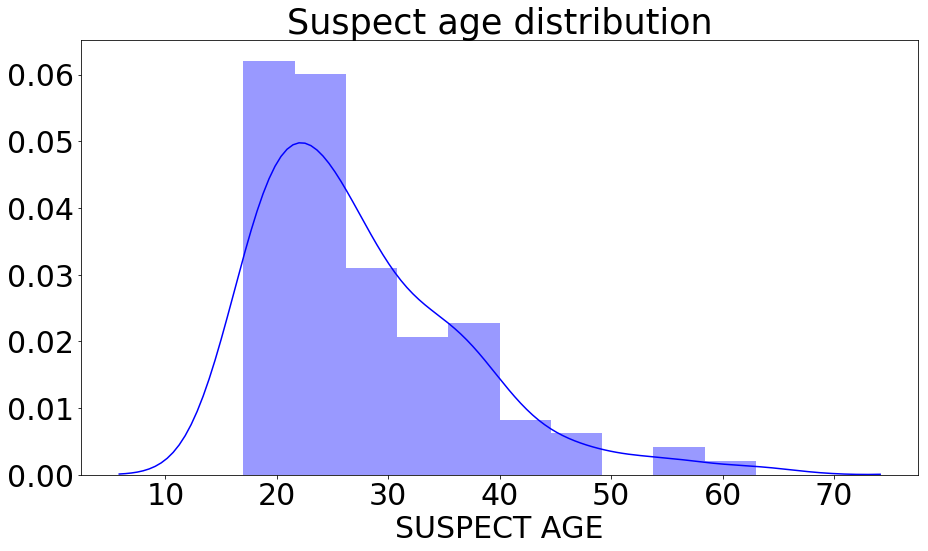

In [3]:
ages = dataset["SUSPECT AGE"].loc[(dataset["SUSPECT AGE"]!='UNK')].replace('Juvenile',18)
ages = pd.to_numeric(ages, errors='coerce').dropna().astype(np.int64)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,8))
plt.title("Suspect age distribution", fontsize=35)
sns.distplot(ages, color="blue")

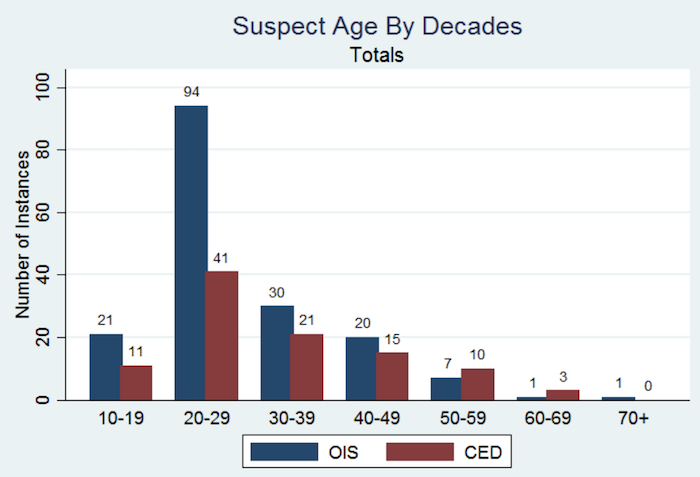

Juveniles are all the 18 year olds (unknown age). Both of the graphs have peaks at the 20-29 age group.

### Suspect gender distribution

Text(0.5,1,'Suspect gender distribution')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


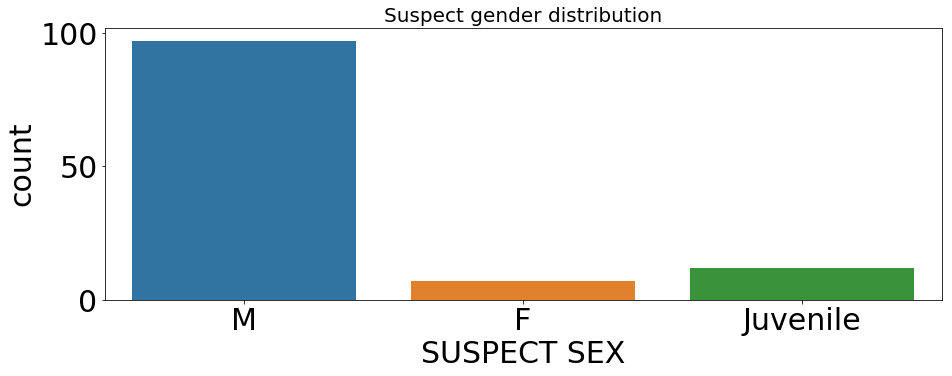

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(data=dataset, x="SUSPECT SEX")

plt.title("Suspect gender distribution", fontsize=20)

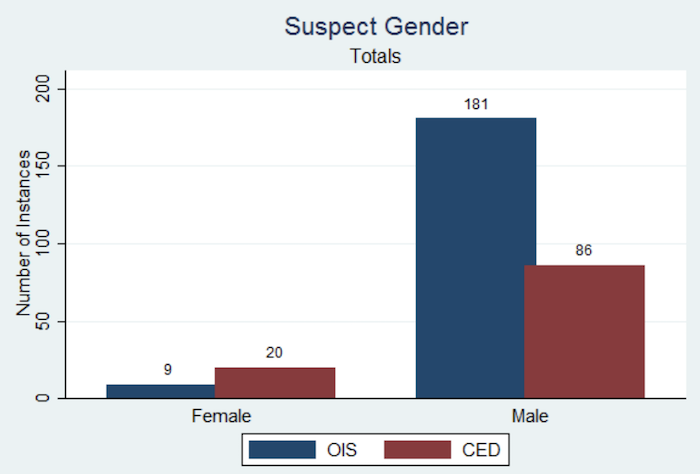

In [5]:
dataset['SUSPECT SEX'].value_counts()

M           97
Juvenile    12
F            7
Name: SUSPECT SEX, dtype: int64

In [6]:
m1 = 97.0/(97.0+7.0)
m2 = 181.0/(181.0+9.0)
print('Current data: ' + str(m1) + '\n')
print('Study: ' + str(m2))

Current data: 0.9326923076923077

Study: 0.9526315789473684


The juveniles don't have a listed sex. In both graphs, significantly more male than female suspects are shot. Roughly 1 out of every 20 suspects in both graphs are female. 

### Distribution of suspects by race

In [7]:
dataset.head()

,DATE,LOCATION,SUSPECT SEX,SUSPECT RACE,SUSPECT AGE,SUSPECT INJURY,SUSPECT WEAPON,OFFICER SEX 1,OFFICER RACE 1,OFFICER AGE 1,OFFICER INJURY 1,ON DUTY 1,OFFICER SEX 2,OFFICER RACE 2,OFFICER AGE 2,OFFICER INJURY 2,ON DUTY 2,OFFICER SEX 3,OFFICER RACE 3,OFFICER AGE 3,OFFICER INJURY 3,ON DUTY 3,OFFICER SEX 4,OFFICER RACE 4,OFFICER AGE 4,OFFICER INJURY 4,ON DUTY 4,OFFICER SEX 5,OFFICER RACE 5,OFFICER AGE 5,OFFICER INJURY 5,ON DUTY 5,OFFICER SEX 6,OFFICER RACE 6,OFFICER AGE 6,OFFICER INJURY 6,ON DUTY 6,OFFICER SEX 7,OFFICER RACE 7,OFFICER AGE 7,OFFICER INJURY 7,ON DUTY 7,RESPONSE TYPE,NUM OF OFFICERS,SYNOPSIS,Population of Suspect Race
0,7/26/18,4600 Tidwell,M,B,17,None,Firearm,M,H,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,2 or More,NaN,498466
1,7/26/18,4600 Tidwell,M,B,19,Wounded,Firearm,M,H,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,2 or More,NaN,498466
2,7/15/18,8600 Helmers St,M,H,18,Wounded,Firearm,M,W,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,2 or More,NaN,919668
3,6/22/18,3434 Tidwell Rd,M,H,33,None,Firearm,M,B,44,None,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,1,NaN,919668
4,6/18/18,10800 Sabo Rd,M,H,37,None,Other,M,W,56,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,1,NaN,919668


Text(0.5,0,'')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


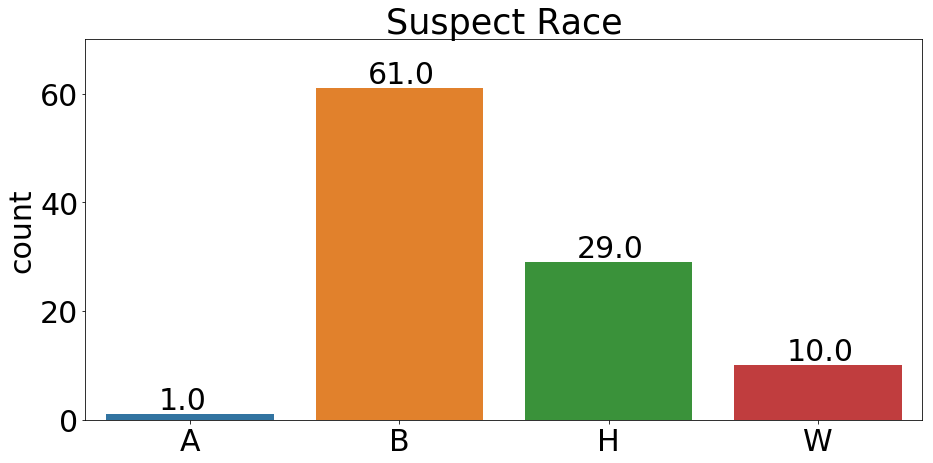

In [8]:
raceData = dataset.copy()
raceData = raceData[raceData['SUSPECT RACE'] != 'U']
raceData = raceData[raceData['SUSPECT RACE'] != 'A']
raceData = raceData[raceData['SUSPECT RACE'] != 'Juvenile']

raceData2 = []
raceData2.insert(0, {'DATE': '1','LOCATION': '1','SUSPECT SEX': '1', 'SUSPECT RACE': 'A', 'SUSPECT AGE': '1', 'SUSPECT INJURY': '1'})
raceData3 = pd.concat([pd.DataFrame(raceData2), raceData], ignore_index=True)

plt.figure(figsize=(15,7))
plt.ylim(0, 70)
ax = sns.countplot(data=raceData3, x="SUSPECT RACE")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.25, p.get_height()+1))

plt.title("Suspect Race", fontsize=35)
ax.set_xlabel('')

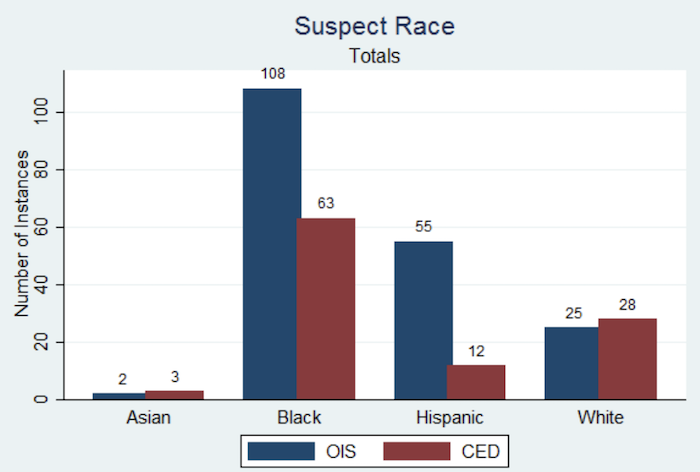

In [9]:
dataset['SUSPECT RACE'].value_counts()[:5]

B           61
H           29
Juvenile    12
W           10
U            3
Name: SUSPECT RACE, dtype: int64

In [10]:
total1 = 61 + 29 + 10 + 1
black1 = 61.0/total1
his1 = 29.0/total1
white1 = 10.0/total1
asian1 = 1.0/total1

total2 = 2 + 108 + 55 + 25
black2 = 108.0/total2
his2 = 55.0/total2
white2 = 25.0/total2
asian2 = 2.0/total2

print('Current data distribution of blacks, hispanics, whites, and asians: ' + str(black1) + ' ' + str(his1) + ' ' + str(white1) + ' ' + str(asian1) + '\n')
print('Study distribution of blacks, hispanics, whites, and asians: ' + str(black2) + ' ' + str(his2) + ' ' + str(white2) + ' ' + str(asian2) + '\n')

Current data distribution of blacks, hispanics, whites, and asians: 0.6039603960396039 0.2871287128712871 0.09900990099009901 0.009900990099009901

Study distribution of blacks, hispanics, whites, and asians: 0.5684210526315789 0.2894736842105263 0.13157894736842105 0.010526315789473684



B - black, H - hispanic, W - white, A - asian, U - unknown

Both studies had roughly the same suspect racial distributions. In both studies, the percentage of black suspects is around 55-60% and the percentage of hispanic suspects is around 28%; however, the percentage of white suspects in each is only around 9-13%.

### Suspect injuries

Text(0.5,0,'')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


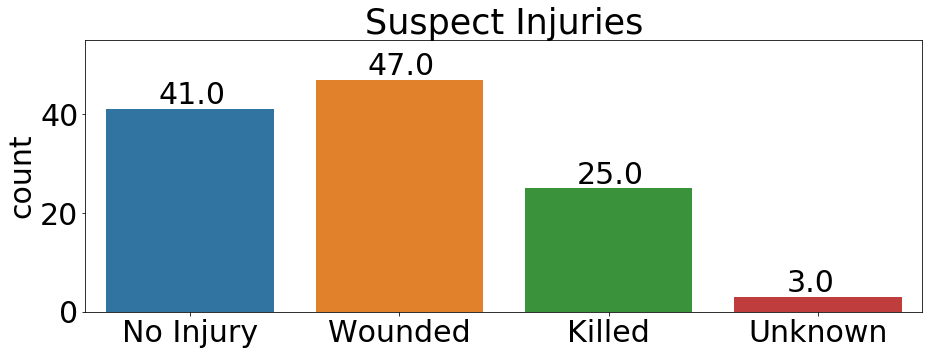

In [11]:
dataInjury = dataset.copy()
dataInjury['SUSPECT INJURY'] = dataInjury['SUSPECT INJURY'].replace('None','No Injury')

plt.figure(figsize=(15,5))
ax = sns.countplot(data=dataInjury, x="SUSPECT INJURY")
plt.ylim(0, 55)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.25, p.get_height()+1))

plt.title("Suspect Injuries", fontsize=35)
ax.set_xlabel('')

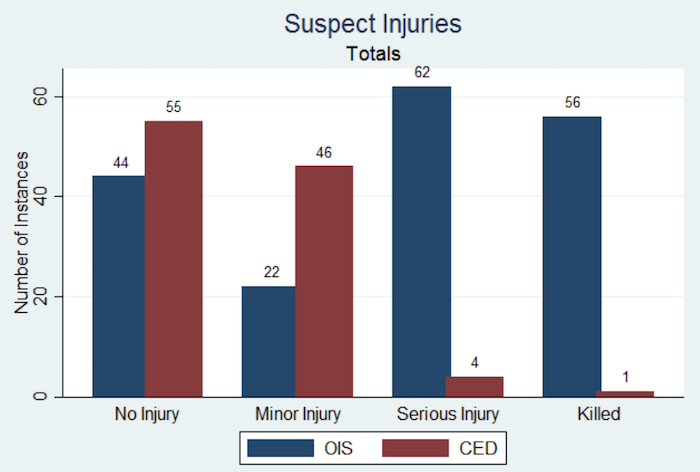

There is no data for juveniles. The largest group in both graphs out of killed, wounded, and no injury is wounded.

### Suspect weapon

Text(0.5,1,'Suspect weapon')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


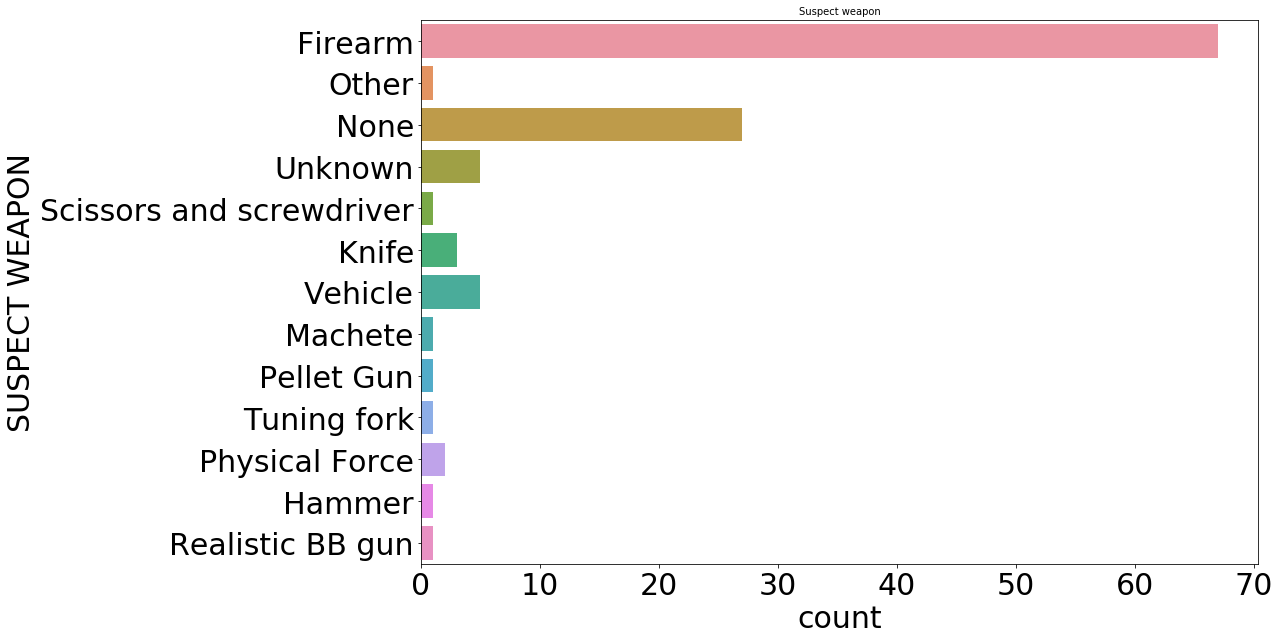

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(data=dataset, y="SUSPECT WEAPON")

plt.title("Suspect weapon", fontsize=10)

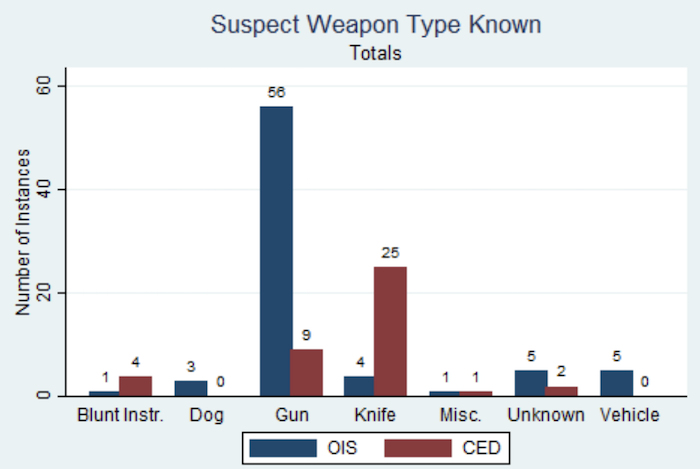

In both graphs, most suspects, if they had a weapon, had a firearm.

## Officer data

### Load in officer data in an easier to use format

In [13]:
#dataset contains all of the officer data in 5 unified rows
officerDS = pd.read_csv('/Users/nevingeorge/Desktop/CS/Python/Houston OIS/Officer Data.csv')

# Display beginning of dataset
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
officerDS.head()

,OFFICER SEX,OFFICER RACE,OFFICER AGE,OFFICER INJURY,ON DUTY
0,M,H,29,None,Y
1,M,H,29,None,Y
2,M,W,29,None,Y
3,M,B,44,None,N
4,M,W,56,None,Y


### Officer age distribution

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


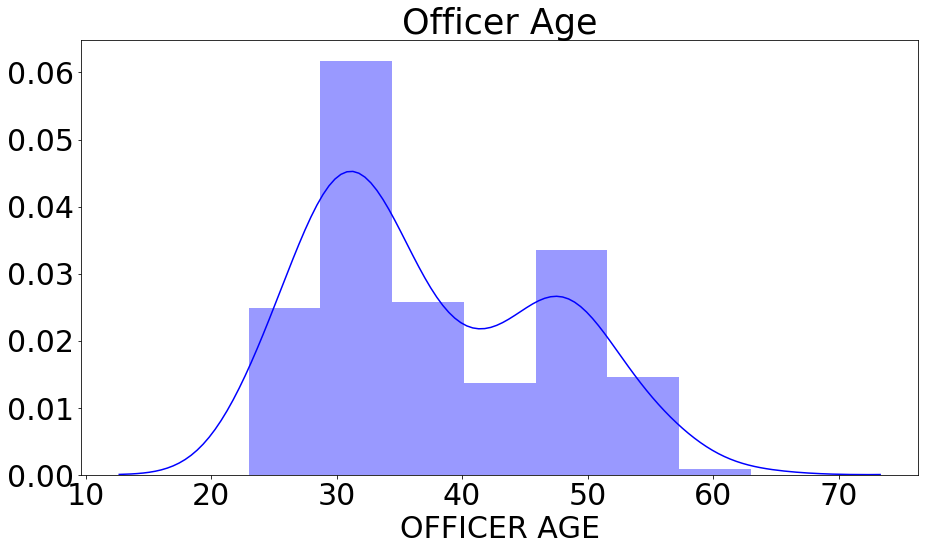

In [14]:
plt.figure(figsize=(15,8))
plt.title("Officer Age", fontsize=35)
sns.distplot(officerDS["OFFICER AGE"], color="blue")

Text(0.5,0,'')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


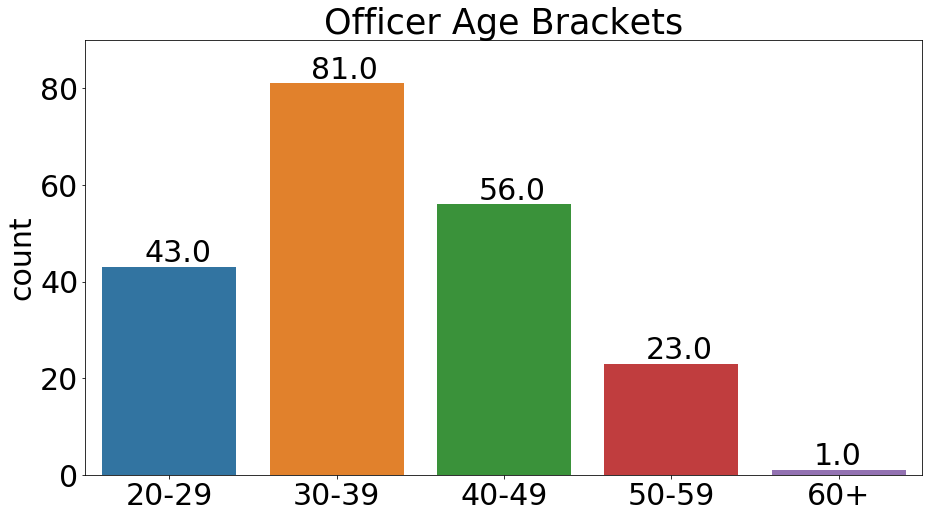

In [15]:
officerAge = officerDS.copy()
officerAge['OFFICER AGE'] = officerAge['OFFICER AGE'].apply(pd.to_numeric, errors='coerce')

officerAge['OFFICER AGE'] = np.where(officerAge['OFFICER AGE'].between(20,29), 0, officerAge['OFFICER AGE'])
officerAge['OFFICER AGE'] = np.where(officerAge['OFFICER AGE'].between(30,39), 1, officerAge['OFFICER AGE'])
officerAge['OFFICER AGE'] = np.where(officerAge['OFFICER AGE'].between(40,49), 2, officerAge['OFFICER AGE'])
officerAge['OFFICER AGE'] = np.where(officerAge['OFFICER AGE'].between(50,59), 3, officerAge['OFFICER AGE'])
officerAge['OFFICER AGE'] = np.where(officerAge['OFFICER AGE'] > 59, 4, officerAge['OFFICER AGE'])
officerAge['OFFICER AGE'] = officerAge['OFFICER AGE'].replace(0,'20-29')
officerAge['OFFICER AGE'] = officerAge['OFFICER AGE'].replace(1,'30-39')
officerAge['OFFICER AGE'] = officerAge['OFFICER AGE'].replace(2,'40-49')
officerAge['OFFICER AGE'] = officerAge['OFFICER AGE'].replace(3,'50-59')
officerAge['OFFICER AGE'] = officerAge['OFFICER AGE'].replace(4,'60+')

officerAge2 = []
officerAge2.insert(0, {'OFFICER SEX': '1','OFFICER RACE': '1','OFFICER AGE': '30-39', 'OFFICER INJURY': 'A', 'ON DUTY': '1'})
officerAge2.insert(0, {'OFFICER SEX': '1','OFFICER RACE': '1','OFFICER AGE': '20-29', 'OFFICER INJURY': 'A', 'ON DUTY': '1'})
officerAge3 = pd.concat([pd.DataFrame(officerAge2), officerAge], ignore_index=True)

officerAge3.drop(4, inplace=True)
officerAge3.drop(20, inplace=True)

plt.figure(figsize=(15,8))
plt.title("Officer Age Brackets", fontsize=35)
ax = sns.countplot(data=officerAge3, x="OFFICER AGE")

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.25, p.get_height()+1))
        
plt.ylim(0, 90)
ax.set_xlabel('')

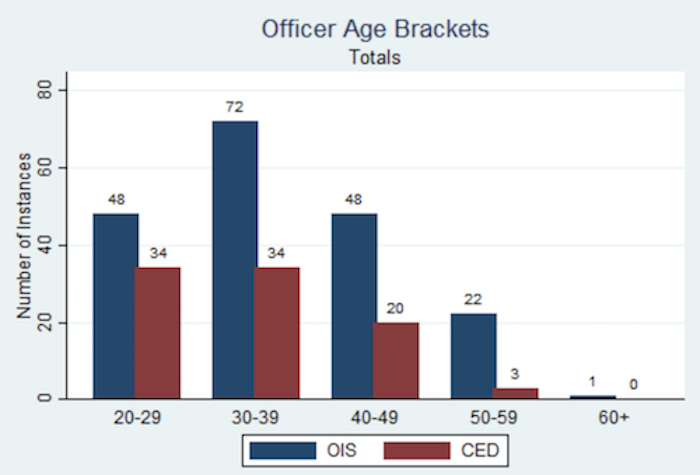

Both graphs have a peak at 30-39. However, the graph of the current data also has a small peak at around 50.

### Officer gender distribution

Text(0.5,0,'')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


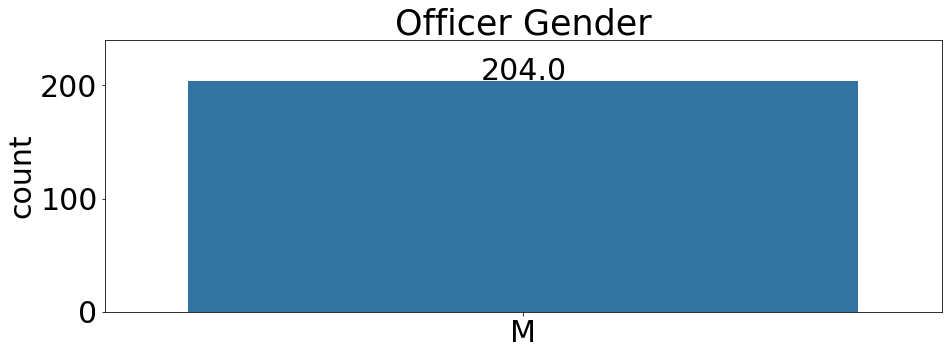

In [16]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=officerDS, x="OFFICER SEX")
plt.title("Officer Gender", fontsize=35)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+1))
        
plt.ylim(0, 240)
ax.set_xlabel('')

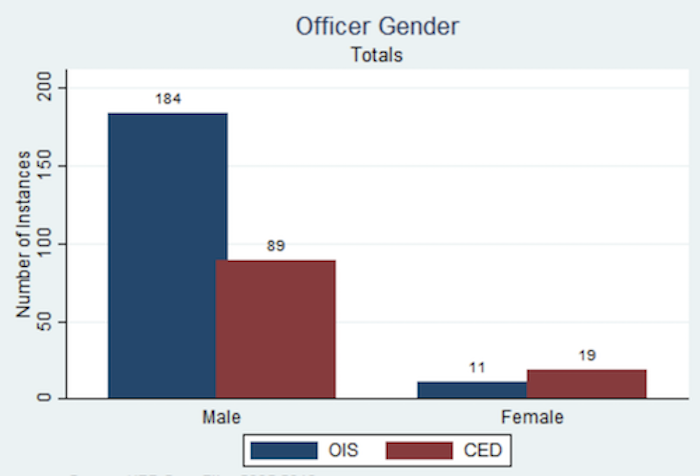

In [17]:
m = 184.0/(184.0+11.0)
print(m)

0.9435897435897436


100% of the officers in the current data are males. This is surprising, suggesting that including more females in the police force can affect these results and potentially decrease the number of shootings. In the study, around 94% of the officers are male, so in both studies the vast majority of officers are male.

### Distribution of officers by race

Text(0.5,1,'Distributions of officers by race')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


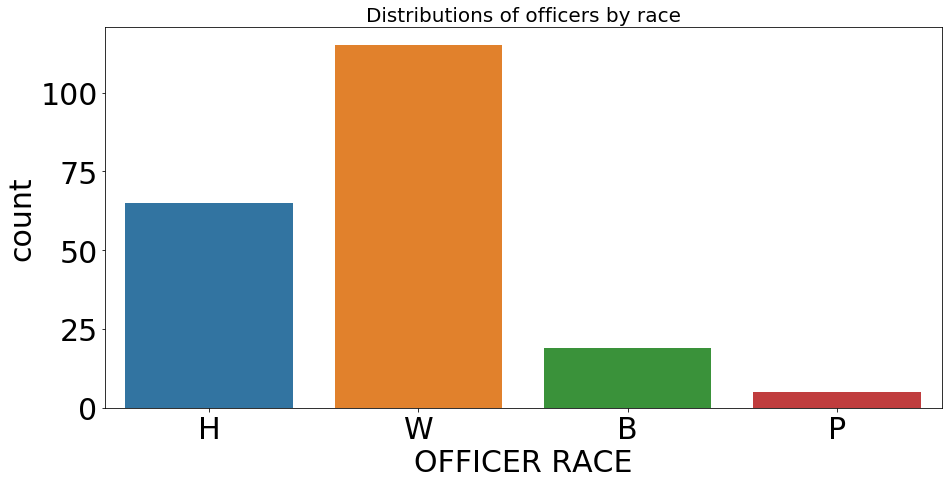

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(data=officerDS, x="OFFICER RACE")

plt.title("Distributions of officers by race", fontsize=20)

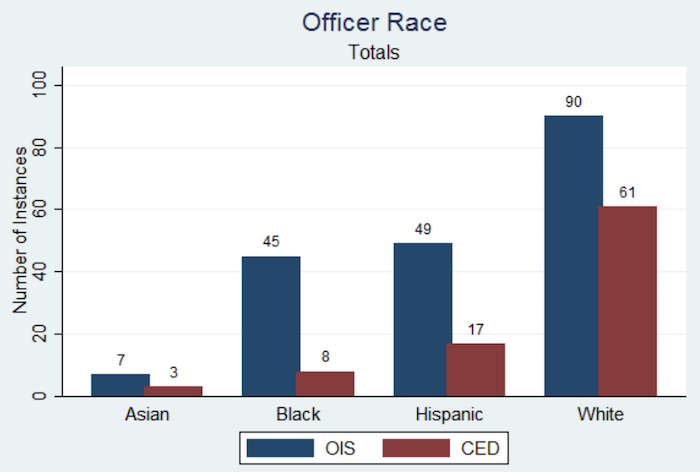

In [19]:
officerDS['OFFICER RACE'].value_counts()

W    115
H     65
B     19
P      5
Name: OFFICER RACE, dtype: int64

In [20]:
w1 = 115.0/(115.0+65.0+19.0+5.0)
w2 = 90.0/(90.0+49.0+45.0+7.0)
print('Current data proportion of white officers: ' + str(w1) + '\n' + 'Study proportion of white officers: ' + str(w2))

Current data proportion of white officers: 0.5637254901960784
Study proportion of white officers: 0.4712041884816754


There is a greater percentage of white officers in the current data.

### Number of officers at the scene

Text(0.5,1,'Number of officers at the scene')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


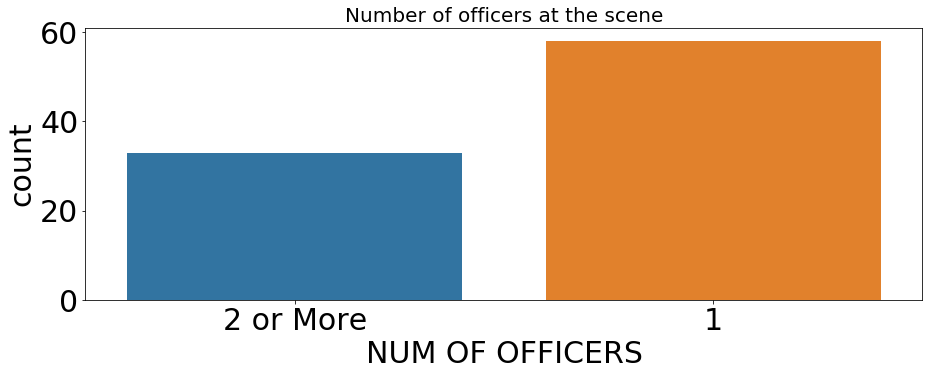

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data=dataset, x="NUM OF OFFICERS")
plt.title("Number of officers at the scene", fontsize=20)

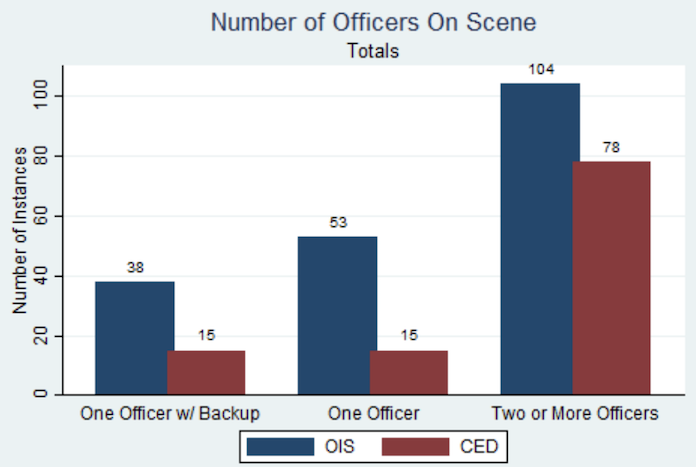

Most scenes only had a single officer there, suggesting that there is a higher chance of an OIS if an officer is alone.

### Officer on duty

Text(0.5,1,'Officer on duty')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


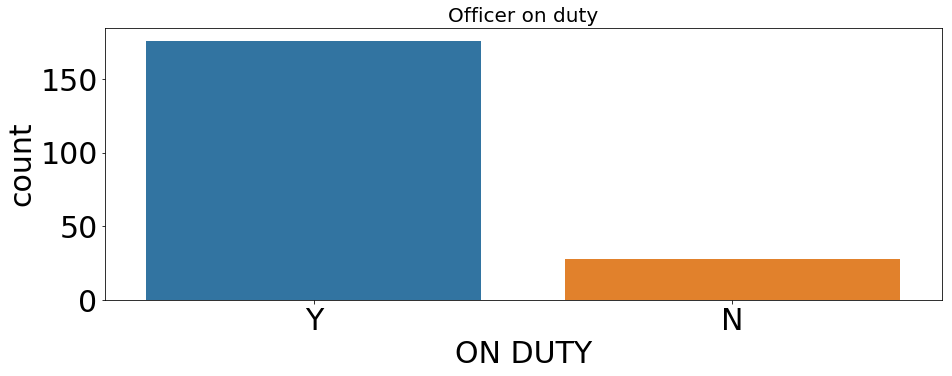

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data=officerDS, x="ON DUTY")
plt.title("Officer on duty", fontsize=20)

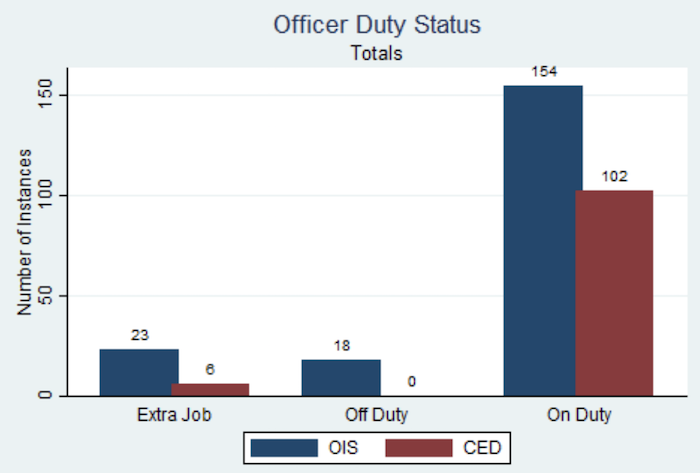

In [23]:
officerDS['ON DUTY'].value_counts()

Y    176
N     28
Name: ON DUTY, dtype: int64

In [24]:
od1 = 176.0/(176.0+28.0)
od2 = 154.0/(154.0+18.0)

print('Current data proportion of officers that were on duty during the incident: ' + str(od1) + '\n')
print('Study proportion of officers that were on duty during the incident: ' + str(od2))

Current data proportion of officers that were on duty during the incident: 0.8627450980392157

Study proportion of officers that were on duty during the incident: 0.8953488372093024


In both studies, 85-90% of the officers were on duty.

## Additional Data

### Suspects as a proportion of their respective race in Houston

In [25]:
#List of number of people killed by race
races = ["B", "H", "W", "A"]
numbers = [498466, 919668, 1060491, 126378]
suspect_by_race = []

for i in races:
    i_suspect = dataset['SUSPECT RACE'].loc[(dataset["SUSPECT RACE"]==i)].count()
    suspect_by_race.append(i_suspect)
    
print(suspect_by_race)

[61, 29, 10, 1]


In [26]:
#calculate proportions
prop_suspect_by_race = []

for i in races:
    
    if i == "B":
        prop_i_suspect = suspect_by_race[0]/498466
        print(prop_i_suspect)
    elif i == "H":
        prop_i_suspect = suspect_by_race[1]/919668
        print(prop_i_suspect)
    elif i == "W":
        prop_i_suspect = suspect_by_race[2]/1060491
        print(prop_i_suspect)
    else:
        prop_i_suspect = suspect_by_race[3]/126378
        print(prop_i_suspect)
    
    prop_suspect_by_race.append(prop_i_suspect)

0.00012237544787407768
3.153311847318815e-05
9.429594404855864e-06
7.912769627625061e-06


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


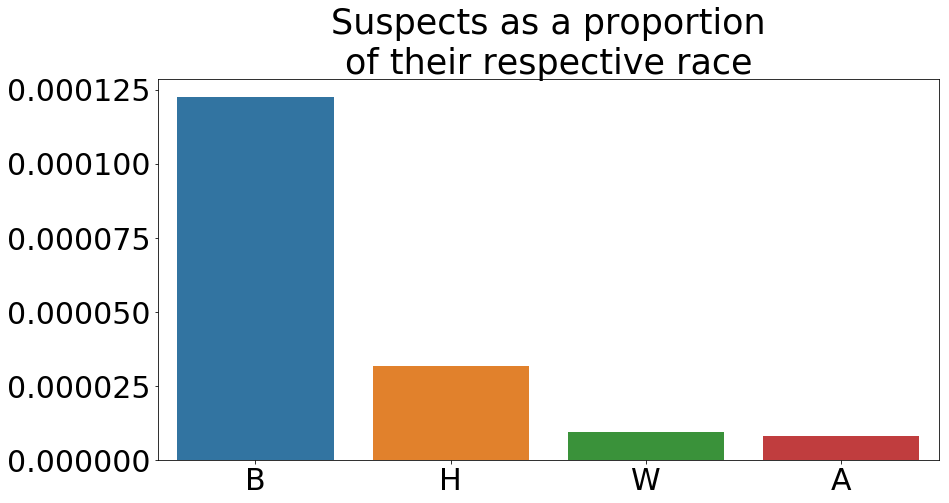

In [27]:
#plot proportions
plt.figure(figsize=(14,7))
plt.title("Suspects as a proportion\nof their respective race", fontsize=35)
sns.barplot(x=races, y=prop_suspect_by_race)

This shows blacks are killed at a disproportionate number compared to hispanics, whites, and asians with respect to the population size of each race in Houston.

### Comparing the suspect age distributions of blacks, hispanics, whites, and asians

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


Average age of black victims is 28.14814814814815
Average age of hispanic victims is 27.428571428571427
Average age of white victims is 37.9
Average age of asian victims is 21.0


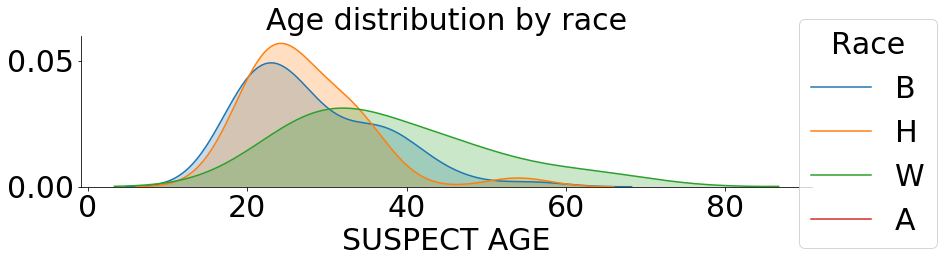

In [28]:
#dataset with the three races
tempDS = dataset
tempDS["SUSPECT AGE"] = pd.to_numeric(tempDS["SUSPECT AGE"], errors='coerce').dropna().astype(np.int64)
four_races = tempDS.loc[(tempDS["SUSPECT RACE"] == "B") | (tempDS["SUSPECT RACE"] == "H") | (tempDS["SUSPECT RACE"] == "W") | (tempDS["SUSPECT RACE"] == "A")]

g = sns.FacetGrid(data=four_races, hue="SUSPECT RACE", aspect=3, size=4)
g.map(sns.kdeplot, "SUSPECT AGE", shade=True)
g.add_legend(title="Race")

plt.title("Age distribution by race", fontsize=30)

#output averages ages of the three races
avg_age_b = tempDS["SUSPECT AGE"][(tempDS["SUSPECT RACE"] == "B")].mean() 
avg_age_h = tempDS["SUSPECT AGE"][(tempDS["SUSPECT RACE"] == "H")].mean() 
avg_age_w = tempDS["SUSPECT AGE"][(tempDS["SUSPECT RACE"] == "W")].mean() 
avg_age_a = tempDS["SUSPECT AGE"][(tempDS["SUSPECT RACE"] == "A")].mean()                                                                                                 

print ("Average age of black victims is " + str(avg_age_b))
print ("Average age of hispanic victims is " + str(avg_age_h))
print ("Average age of white victims is " + str(avg_age_w))
print ("Average age of asian victims is " + str(avg_age_a))

Whites suspects are on average around 10 years older than black and hispanic suspects. There is only 1 asian suspect, so there is not enough data there for comparison.

### Officer injuries

Text(0.5,0,'')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


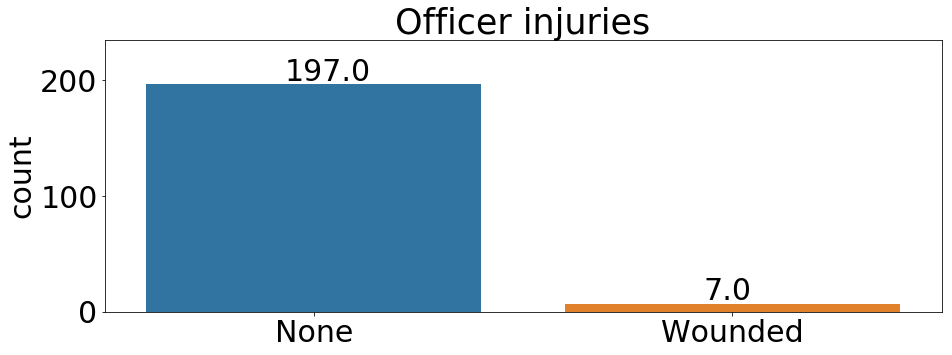

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=officerDS, x="OFFICER INJURY")
plt.title("Officer injuries", fontsize=35)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.33, p.get_height()+3))
        
plt.ylim(0, 235)
ax.set_xlabel('')

In [30]:
officerDS['OFFICER INJURY'].value_counts()

None       197
Wounded      7
Name: OFFICER INJURY, dtype: int64

In [31]:
oi = 197.0/(197.0+7.0)
oi

0.9656862745098039

Most officers were not wounded.

# Analyze the Data

In [32]:
dataset.head()

,DATE,LOCATION,SUSPECT SEX,SUSPECT RACE,SUSPECT AGE,SUSPECT INJURY,SUSPECT WEAPON,OFFICER SEX 1,OFFICER RACE 1,OFFICER AGE 1,OFFICER INJURY 1,ON DUTY 1,OFFICER SEX 2,OFFICER RACE 2,OFFICER AGE 2,OFFICER INJURY 2,ON DUTY 2,OFFICER SEX 3,OFFICER RACE 3,OFFICER AGE 3,OFFICER INJURY 3,ON DUTY 3,OFFICER SEX 4,OFFICER RACE 4,OFFICER AGE 4,OFFICER INJURY 4,ON DUTY 4,OFFICER SEX 5,OFFICER RACE 5,OFFICER AGE 5,OFFICER INJURY 5,ON DUTY 5,OFFICER SEX 6,OFFICER RACE 6,OFFICER AGE 6,OFFICER INJURY 6,ON DUTY 6,OFFICER SEX 7,OFFICER RACE 7,OFFICER AGE 7,OFFICER INJURY 7,ON DUTY 7,RESPONSE TYPE,NUM OF OFFICERS,SYNOPSIS,Population of Suspect Race
0,7/26/18,4600 Tidwell,M,B,17.0,None,Firearm,M,H,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,2 or More,NaN,498466
1,7/26/18,4600 Tidwell,M,B,19.0,Wounded,Firearm,M,H,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,2 or More,NaN,498466
2,7/15/18,8600 Helmers St,M,H,18.0,Wounded,Firearm,M,W,29,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,2 or More,NaN,919668
3,6/22/18,3434 Tidwell Rd,M,H,33.0,None,Firearm,M,B,44,None,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,1,NaN,919668
4,6/18/18,10800 Sabo Rd,M,H,37.0,None,Other,M,W,56,None,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emergency Call,1,NaN,919668


### Adapting the Data

In [33]:
data = dataset
data.drop(["DATE","LOCATION","SYNOPSIS"], axis = 1, inplace=True)

#replacing the genders male, female, and juvenile with 1, 2, and 3
cols = ["SUSPECT SEX", "OFFICER SEX 1", "OFFICER SEX 2", "OFFICER SEX 3", "OFFICER SEX 4", "OFFICER SEX 5", "OFFICER SEX 6", "OFFICER SEX 7"]
data[cols] = data[cols].replace('M',1)
data[cols] = data[cols].replace('F',2)
data[cols] = data[cols].replace('Juvenile',3)

#replacing the races W, B, H, A, U, and Juvenile with 0, 1, 2, 3, 4, 5, and 6
cols = ["SUSPECT RACE", "OFFICER RACE 1", "OFFICER RACE 2", "OFFICER RACE 3", "OFFICER RACE 4", "OFFICER RACE 5", "OFFICER RACE 6", "OFFICER RACE 7"]
data[cols] = data[cols].replace('W',1)
data[cols] = data[cols].replace('B',2)
data[cols] = data[cols].replace('H',3)
data[cols] = data[cols].replace('A',4)
data[cols] = data[cols].replace('U',5)
data[cols] = data[cols].replace('Juvenile',6)

#replacing On Duty Y and N with 1 and 2
cols = ["ON DUTY 1", "ON DUTY 2", "ON DUTY 3", "ON DUTY 4", "ON DUTY 5", "ON DUTY 6", "ON DUTY 7"]
data[cols] = data[cols].replace('Y',1)
data[cols] = data[cols].replace('N',2)

#replacing the suspect and officer injuries None, Wounded, Killed, and Unknown with 1, 2, 3, and 4
cols = ["SUSPECT INJURY", "OFFICER INJURY 1", "OFFICER INJURY 2", "OFFICER INJURY 3", "OFFICER INJURY 4", "OFFICER INJURY 5", "OFFICER INJURY 6", "OFFICER INJURY 7"]
data[cols] = data[cols].replace('None',1)
data[cols] = data[cols].replace('Wounded',2)
data[cols] = data[cols].replace('Killed',3)
data[cols] = data[cols].replace('Unknown',4)

#replacing number of officers 1 and 2 or More with 1 and 2
cols = ["NUM OF OFFICERS"]
data[cols] = data[cols].replace('1',1)
data[cols] = data[cols].replace('2 or More',2)

#replacing suspect weapon Unknown, None, firearm, and everything else with 1, 2, 3, 4
cols = ["SUSPECT WEAPON"]
data[cols] = data[cols].replace('Unknown',1)
data[cols] = data[cols].replace('None',2)
data[cols] = data[cols].replace('Firearm',3)
data[cols] = data[cols].replace('Scissors and screwdriver',4)
data[cols] = data[cols].replace('Knife',4)
data[cols] = data[cols].replace('Vehicle',4)
data[cols] = data[cols].replace('Machete',4)
data[cols] = data[cols].replace('Pellet Gun',4)
data[cols] = data[cols].replace('Tuning fork',4)
data[cols] = data[cols].replace('Physical Force',4)
data[cols] = data[cols].replace('Hammer',4)
data[cols] = data[cols].replace('Realistic BB gun',4)
data[cols] = data[cols].replace('Other',4)

#replacing response type Other, Emergency Call/Emer Call, and ER with 1, 2, and 3
cols = ["RESPONSE TYPE"]
data[cols] = data[cols].replace('Other',1)
data[cols] = data[cols].replace('Emergency Call',2)
data[cols] = data[cols].replace('Emer Call',2)
data[cols] = data[cols].replace('ER',3)

#final check
cols = data.columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

data.fillna(0, inplace=True)

data.head()

,SUSPECT SEX,SUSPECT RACE,SUSPECT AGE,SUSPECT INJURY,SUSPECT WEAPON,OFFICER SEX 1,OFFICER RACE 1,OFFICER AGE 1,OFFICER INJURY 1,ON DUTY 1,OFFICER SEX 2,OFFICER RACE 2,OFFICER AGE 2,OFFICER INJURY 2,ON DUTY 2,OFFICER SEX 3,OFFICER RACE 3,OFFICER AGE 3,OFFICER INJURY 3,ON DUTY 3,OFFICER SEX 4,OFFICER RACE 4,OFFICER AGE 4,OFFICER INJURY 4,ON DUTY 4,OFFICER SEX 5,OFFICER RACE 5,OFFICER AGE 5,OFFICER INJURY 5,ON DUTY 5,OFFICER SEX 6,OFFICER RACE 6,OFFICER AGE 6,OFFICER INJURY 6,ON DUTY 6,OFFICER SEX 7,OFFICER RACE 7,OFFICER AGE 7,OFFICER INJURY 7,ON DUTY 7,RESPONSE TYPE,NUM OF OFFICERS,Population of Suspect Race
0,1,2,17.0,1,3,1,3.0,29,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,498466.0
1,1,2,19.0,2,3,1,3.0,29,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,498466.0
2,1,3,18.0,2,3,1,1.0,29,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,919668.0
3,1,3,33.0,1,3,1,2.0,44,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,919668.0
4,1,3,37.0,1,4,1,1.0,56,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,919668.0


### Logistic Regression Algorithm to predict suspect injury

In [34]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

y = data["SUSPECT INJURY"]
#too many NaN values
x = data
x.drop(["SUSPECT INJURY","OFFICER SEX 2", "OFFICER RACE 2", "OFFICER AGE 2", "OFFICER INJURY 2", "ON DUTY 2", "OFFICER SEX 3", "OFFICER RACE 3", "OFFICER AGE 3", "OFFICER INJURY 3", "ON DUTY 3","OFFICER SEX 4", "OFFICER RACE 4", "OFFICER AGE 4", "OFFICER INJURY 4", "ON DUTY 4","OFFICER SEX 5", "OFFICER RACE 5", "OFFICER AGE 5", "OFFICER INJURY 5", "ON DUTY 5","OFFICER SEX 6", "OFFICER RACE 6", "OFFICER AGE 6", "OFFICER INJURY 6", "ON DUTY 6","OFFICER SEX 7", "OFFICER RACE 7", "OFFICER AGE 7", "OFFICER INJURY 7", "ON DUTY 7","RESPONSE TYPE"], axis=1, inplace=True)
x.head()

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,SUSPECT SEX,SUSPECT RACE,SUSPECT AGE,SUSPECT WEAPON,OFFICER SEX 1,OFFICER RACE 1,OFFICER AGE 1,OFFICER INJURY 1,ON DUTY 1,NUM OF OFFICERS,Population of Suspect Race
0,1,2,17.0,3,1,3.0,29,1,1,2.0,498466.0
1,1,2,19.0,3,1,3.0,29,1,1,2.0,498466.0
2,1,3,18.0,3,1,1.0,29,1,1,2.0,919668.0
3,1,3,33.0,3,1,2.0,44,1,2,1.0,919668.0
4,1,3,37.0,4,1,1.0,56,1,1,1.0,919668.0


In [35]:
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=7)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
predictions = logmodel.predict(X_test)
print (classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.17      0.14      0.15         7
          2       0.44      0.67      0.53        12
          3       0.00      0.00      0.00         5

avg / total       0.27      0.38      0.31        24



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
#Accuracy score
log_accuracy_score = accuracy_score(y_test, predictions)
log_accuracy_score

0.375

### SVM Algorithm to predict suspect injury

In [38]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

clf = SVC()
clf.fit(x, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.83      0.71      0.77         7
          2       0.80      1.00      0.89        12
          3       1.00      0.60      0.75         5

avg / total       0.85      0.83      0.83        24



In [40]:
svm_accuracy_score = accuracy_score(y_test, pred)
svm_accuracy_score

0.8333333333333334

### Random Forest Algorithm to predict suspect injury

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
clf.fit(x, y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
pred = logmodel.predict(X_test)
print (classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.17      0.14      0.15         7
          2       0.44      0.67      0.53        12
          3       0.00      0.00      0.00         5

avg / total       0.27      0.38      0.31        24



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
rf_accuracy_score = accuracy_score(y_test, pred)
rf_accuracy_score

0.375

### Decision Tree Algorithm to predict suspect injury

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=176)

clf = DecisionTreeClassifier(random_state=0, max_depth = 7)

clf.fit(x, y) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

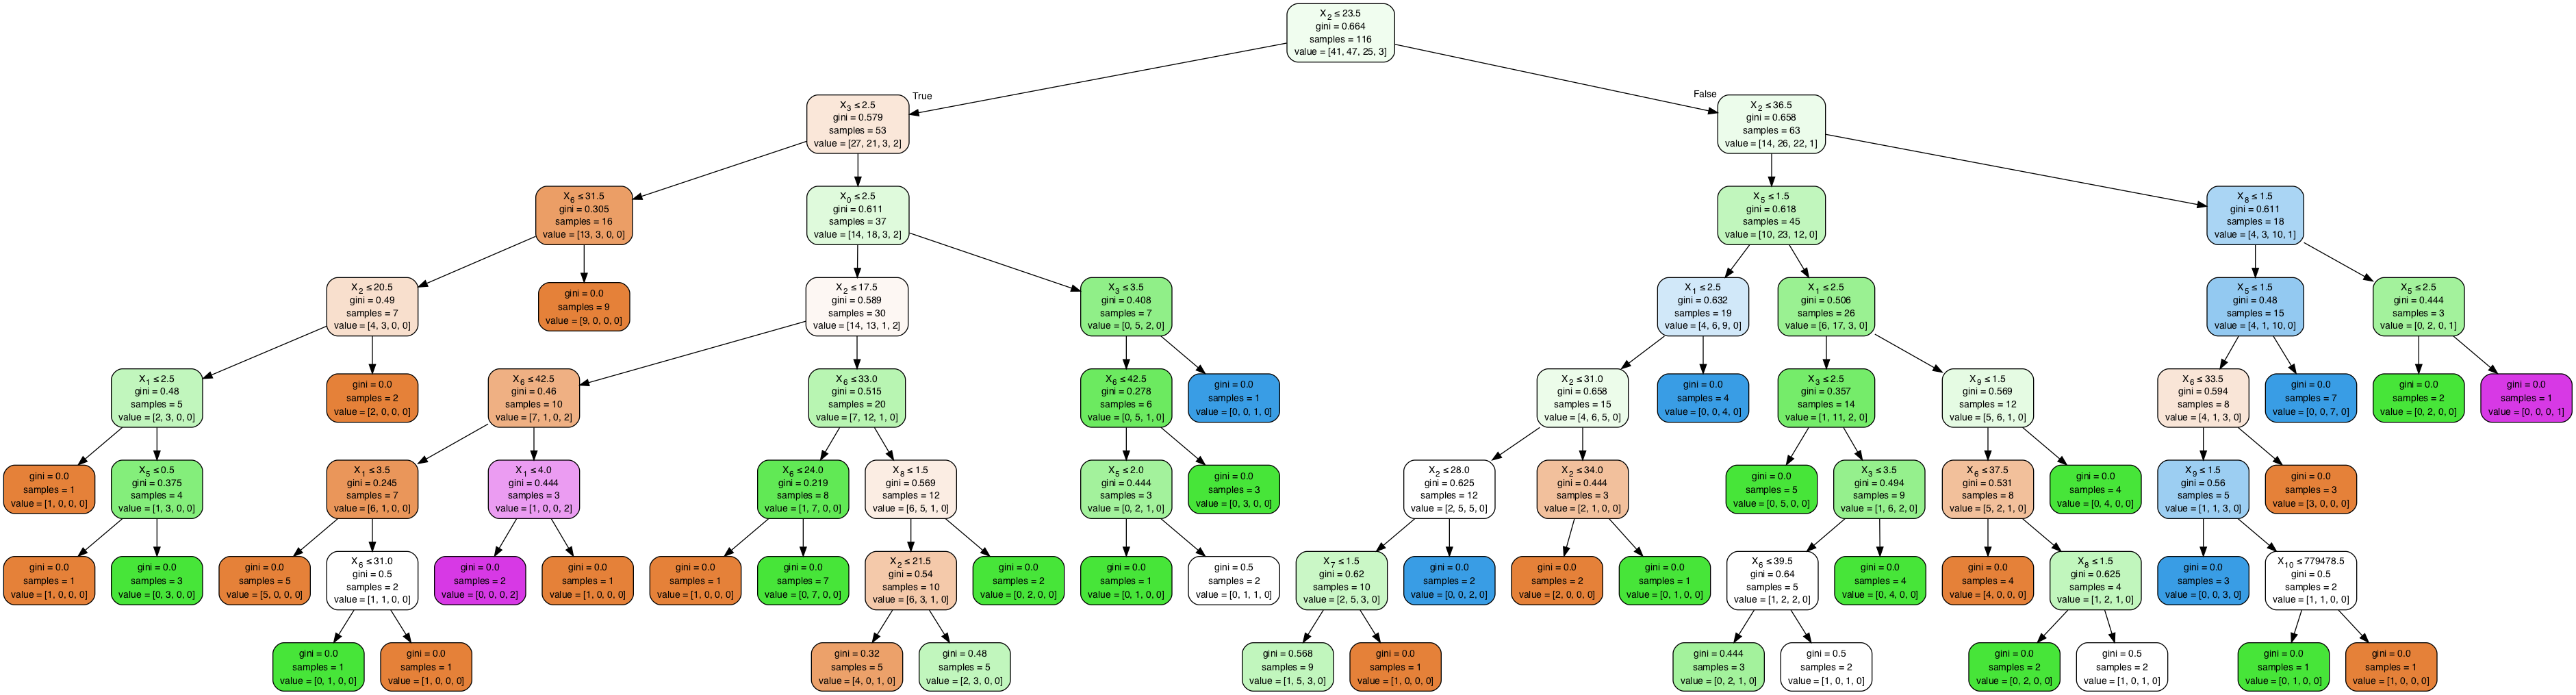

In [45]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [46]:
#save image
graph.write_pdf("decisionTree7.pdf")

True

In [47]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.89      1.00      0.94         8
          2       0.92      1.00      0.96        11
          3       1.00      0.60      0.75         5

avg / total       0.92      0.92      0.91        24



In [48]:
dt_accuracy_score = accuracy_score(y_test, pred)
dt_accuracy_score

0.9166666666666666

### Logistic Regression Algorithm to predict suspect race

In [49]:
y = data["SUSPECT RACE"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
predictions = logmodel.predict(X_test)
print (classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         4
          2       0.80      1.00      0.89         8
          3       0.75      1.00      0.86         6
          5       0.00      0.00      0.00         2
          6       0.67      1.00      0.80         4

avg / total       0.57      0.75      0.64        24



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
#Accuracy score
log_accuracy_score = accuracy_score(y_test, predictions)
log_accuracy_score

0.75

### SVM Algorithm to predict suspect race

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

clf = SVC()
clf.fit(x, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         8
          3       1.00      1.00      1.00         6
          5       1.00      0.50      0.67         2
          6       0.80      1.00      0.89         4

avg / total       0.97      0.96      0.95        24



In [54]:
svm_accuracy_score = accuracy_score(y_test, pred)
svm_accuracy_score

0.9583333333333334

# Findings

Most of the graphs showed similar results between the current data set and the previous study, suggesting that the sharp decrease in police shootings may have been influenced by the passage of the Act.

The Decision Tree Clasifier predicted suspect injury with 91.67% accuracy. SVM predicted suspect race with 95.83% accuracy.